# CSCI 5454: Assignment 4

Your Name: 


Collaborated With:


## Problem 1 (10 points)

Consider the program below:

`def findMinimum(a):
     n = len(a)
     minSoFar =  math.inf
     for i in range(n):
         if (a[i] < minSoFar):
            minSoFar = a[i] # <-- X
     return minSoFar`
     
 If $a$ is a random array of numbers $1, \ldots, n$ such that any of the $n!$ permutations is equally probable. What is the expected number of times the variable `minSoFar` is updated in the for loop (i.e, the statement marked "X" is executed)? Your answer must be a function of $n$, asymptotic notation is fine and you must show the steps/justification that you used to arrive at your answer clearly and concisely.

## Solution (Expected length: 5 lines)

Variable `minSoFar` is updated every time an element larger than all the previous elements is encountered.

Let $X_i$ be the indicator random variable associated with the event in which ith element is larger than all the elements seen so far.

$$X_i = I\{ith \ element \ is \ larger \ than \ all \ previous \ elements\}$$

$$ E[X_i] = E[I\{X_i\}] = Pr\{ith \ element \ is \ larger \ than \ all \ previous \ elements\} $$

$$X = X_0 + X_1 + \cdots + X_{n-1}$$

Any one of the elements so far is equally likely to be larger of the i elements. Therefore, ith element has $1/(i+1)$ probability of being largest of the i elements.

$$E[X] = \sum_{i=0}^{n-1}E[X_i] = \sum_{i=0}^{n-1}1/(i+1) = \ln{n} + O(1)
$$


## Problem 2A (10 points)

We will now consider a scheme to randomly permute an array of size $n$. You are allowed to generate a single random bit at a time using the `random.getrandbits(1)` function. Write a function `shuffleArray` that will shuffle an input array of $n$ integers so that any permutation is equally probable.

- __Input:__ original list.
- __Return:__ shuffled list.

You __should not__ modify the original array.  You are __forbidden__ to use any random number generator other than `random.getrandbits(1)`.


In [24]:
from random import getrandbits
import math

def customrandom(a, b):
    bit_count = math.ceil(math.log2(b - a + 1))
    while True:
        r = 0
        for i in range(bit_count):
            r = 2 * r + getrandbits(1)
        if a + r <= b:
            return a + r
        
def shuffleArray(a):
    ## BEGIN SOLUTION
    n = len(a)
    b = a[:]
    for i in range(n):
        j = customrandom(i, n-1)
        b[i],b[j] = b[j], b[i]
    ## END SOLUTION
    return b


Chi-Squared value = 31.106
Chi-Squared value = 21.825
Chi-Squared value = 14.934


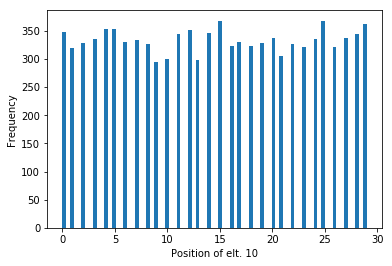

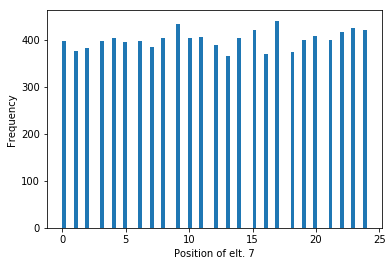

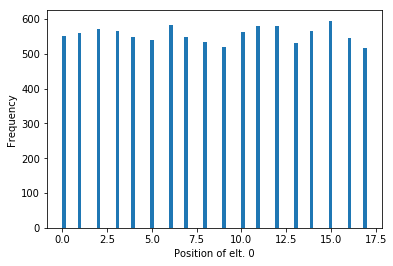

In [25]:
%matplotlib inline
## Begin statistical tests
import matplotlib.pyplot as plt

def placementTest(n, nTrials, elt):
    a = list(range(n))
    where = []
    for i in range(nTrials):
        b = shuffleArray(a)
        # find where element n/2 ended up
        j = b.index(elt)
        where.append(j)
    plt.figure("Position of elt. %d"%(elt))
    plt.hist(where, bins=80)
    plt.xlabel('Position of elt. %d'%(elt))
    plt.ylabel('Frequency')
    # TODO: Implement a xi-squared test 
    # for now let us eyeball the histograms.
    # the histograms must be near uniform. 
    frequency = {}
    for index in where:
        frequency[index] = frequency.get(index, 0) + 1
    exp_frequency = nTrials/n
    chi_squared = 0
    for index in frequency:
        chi_squared += (frequency[index] - exp_frequency)**2/exp_frequency
    print("Chi-Squared value =", round(chi_squared,3))

placementTest(30, 10000, 10)
placementTest(25, 10000, 7)
placementTest(18, 10000, 0)
       
##  End statistical tests

## Problem 2B  (5 Points)

Analyze the expected running time of your algorithm in 2(A) and expected number of random bits used?

## Answer (Expected Size: 5 lines).

$\begin{align*}
T(n) &= \sum_{i=0}^{n-1} k*\log (n - i) \\
&= k*log(n*(n-1)*(n-2)*\cdots*1)\\
&= k*log(n!)
\end{align*}$

$k:$ Expected number of times `While True` in `customrandom` executes

Therefore, expected running time is $\Theta(\log (n!))$

For the number of bits used expected value is $k*\log (n!))$

## Problem 3  (20 points)

We insert keys from $1, \ldots, n$ in a random order into a binary search tree. Throughout this problem,
node $i$ refers to a node with key $i$. The _priority_ of a node is the rank order in which it is inserted
into the tree with the root having priority $1$ and the very last node to be inserted having priority $n$.

In class, we showed that a node $i$ is the ancestor of a node $j$ if and only if $i$ has the lowest priority amongst all nodes $\{ i, \ldots, j\}$ (or $\{ j, \ldots, i\}$ if $j < i$).

(A) State and prove a condition for node $k$ to be a leaf in the tree.  For the purposes of this problem, a node is a leaf if both its children are NIL. 

(B) What is the probability that node $k$ is a leaf? __Hint:__ Your answer should analyze nodes $1, n$ separately from nodes $2, \ldots, n-1$.

(C) Calculate the expected number of leaf nodes. Your answer should be exact: asymptotic notations or bounds are not acceptable.


### Answer (Expected Size: 15 lines)

(A) A node $k$ is a leaf in the tree if and only if it is not an ancestor of any of the other nodes. 

Suppose, nodes are ordered by keys. Let priorities to ordered nodes be: $(p_1, p_2,\cdots, p_{k-1}, p_k, p_{k+1}, \cdots p_n)$. $p_k$ is priority corresponding to node $k$. $p_k \in [1, n]$ All priorities and node keys are distinct.

**Claim**:
For $k = 2, 3, \cdots, n-1$, $k$ is a leaf node if and only if $p_k \gt p_{k-1}$ and $p_k \gt p_{k+1}$

**Proof**: Consider case when $p_{k-1} \gt p_{k+1}$. Node $k+1$ is inserted into the tree, followed by node $k-1$, which becomes left child of the node $k+1$. On inserting node $k$ it becomes left child of the node $k-1$. Now, all the other nodes with keys $(1, 2, \cdots, k-2)$ and $(k+2, k+3, \cdots, n)$ are going to be in left subtree of node $k-1$ and right subtree of node $k+1$ respectively. No node is inserted under node $k$ which therefore becomes a leaf node by definition.

Similar, reasoning for the case when $p_{k+1} \gt p_{k-1}$. And the claim is proved to be true.

$Pr[\text{k is a leaf}] = 2!/3! = 1/3$

**Claim**:
For $k = 1$, $k$ is a leaf node is and only if $p_k \gt p_{k+1}$

**Proof**: All the nodes with keys greater than ${k+1}$ are going to be inserted on the right subtree of node and only $k$ node is going to be inserted on the left subtree. Therefore, node $k$ is a leaf.

Similar, reasoning for the case when $k=n$, $k$ is a leaf node is and only if $p_k \gt p_{k-1}$

$Pr[\text{k is a leaf}] = 1!/2! = 1/2$

(B)

$$Pr[\text{k is a leaf}] = \begin{cases}
1/2, \text{for $k = 1, n$}\\
1/3, \text{for $k = 2, \cdots, n - 1$}
\end{cases}$$

(C)

Lets define indicator random variable $X_i$ for $1 \leq i \leq n$, by

$
X_k = I\text{{node $k$ is a leaf}}\\
E[X_k] = Pr\text{{node $k$ is a leaf}}
$

Let $X$ be the random variable that counts total number of leafs in the tree

$X = \sum_{k=1}^n X_k$

Taking expectations on both sides and applying linearity of expectation, we obtain
$\begin{align}
E[X] &= \sum_{i=0}^n E[X_k]\\
&= E[X_1] + \sum_{k=2}^{n-1}E[X_k] + E[X_n]\\
&= 1/2 + \sum_{k=2}^{n-1}1/3 + 1/2\\
&= 1 + \frac{n-2}{3} = \frac{n+1}{3}
\end{align}$


## Problem 4 (5 points)

We wish to rapidly find the $k^{th}$ smallest element in a skip list. Describe what extra information you would store in each node of the list and how you would find the $k^{th}$ smallest element in a skip list using this information.  What is the running time of your search in the worst case.


## Answer (Expected Size: 5 lines)


For each of the nodes storing its position (or index) in the base list is going to be conducive in finding $k^{th}$ smallest element in a skip list quickly.

Assuming $k$ to be valid.

Now, $k^{th}$ smallest element corresponds to the element at $kth$ position. Using the position information stored at each level we can traverse the shortcut lists till the point we find node with $k$ as its position.

In the worst case, we'll have to traverse entire of the the base list. Therefore, running time is corresponding to the number of nodes in base list which is $O(n)$, where $n$ the number of elements in base list.